<a href="https://colab.research.google.com/github/sambleu13/edo-1-project/blob/main/Samantha_Pantoja_Ortiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Ecuaciones Diferenciales Ordinarias**

# Introducción

A continuación se analizará el modelo para basura de plásticos publicado en el artículo: [ANALYSIS OF NOVEL FRACTIONAL ORDER PLASTIC WASTE MODEL AND ITS EFFECTS ON AIR POLLUTION WITH TREATMENT MECHANISM](https://www.researchgate.net/publication/382298715_ANALYSIS_OF_NOVEL_FRACTIONAL_ORDER_PLASTIC_WASTE_MODEL_AND_ITS_EFFECTS_ON_AIR_POLLUTION_WITH_TREATMENT_MECHANISM). El modelo maneja los componentes plástico $P(t)$, plástico quemado $Q(t)$, plástico reciclado $R(t)$ y contaminación del aire $A(t)$ y se describe por las siguientes ecuaciones diferenciales:
\begin{align}
\frac{dP}{dt}&=\Lambda - \beta PQ - \theta PR + \rho R - \omega P \\
\frac{dQ}{dt}&=\beta PQ + \varphi R - \delta Q - \rho Q \\
\frac{dR}{dt}&= \theta PR - \rho R - \varphi R - \gamma R - \omega R  \\
\frac{dA}{dt}&=\delta Q + \gamma R - \omega A
\end{align}

 Donde $\Lambda$ es la tasa de demanda, $\beta$ es la tasa de quema, $\theta$ es la tasa de reciclaje, $\rho$ es la tasa de reciclado o reutilizado, $\omega$ es la tasa de desperdicio, $\varphi$ es la tasa de quema durante el proceso de reciclaje, $\delta$ es la tasa de contaminación del aire debido al plástico quemado y $\gamma$ es la tasa de contaminación del aire debido al proceso de reciclaje del plástico.

 Vamos a tomar 156 semanas (3 años) para medir la evolución de los componentes, tomando los valores de los parámetros encontrados en el mismo artículo científico:

\begin{align}
\Lambda = 0.05 \\
\beta = 0.35 \\
\theta = 0.40 \\
\rho = 0.20 \\
\varphi = 0.05\\
\gamma = 0.30\\
\delta = 0.40\\
\omega = 0.30
\end{align}

Consideramos también las condiciones iniciales siguientes:
\begin{align}
P(0) &= 5\\
Q(0) &= 2.5\\
R(0) &= 1.25\\
A(0) &= 2
\end{align}

A continuación importamos las librerías para hacer cálculos en python y graficar, así como mostramos el código para calcular las soluciones numéricas con el método elegido.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Valores de los parámetros
L = 0.05
B = 0.35
T = 0.40
RR = 0.2
V = 0.05
G = 0.30
D = 0.40
O = 0.30

#Intervalo de tiempo [0,3]
t0 = 0
tf = 3
#pasos de tiempo
n = 156

#Condiciones inicial
P0 = 5
Q0 = 2.5
R0 = 1.25
A0 = 2

#longitud homogénea del paso de tiempo o tamaño del salto
h = (tf - t0)/n

#vector con el tiempo discretizado
t = np.linspace(t0,tf,n+1)

#vectores de ceros para almacenar las soluciones que se llenará con las iteraciones
P = np.zeros(n+1)
Q = np.zeros(n+1)
R = np.zeros(n+1)
A = np.zeros(n+1)

P[0] = P0
Q[0] = Q0
R[0] = R0
A[0] = A0

# Método Numérico

Para aproximar soluciones numéricas utilizamos el método de euler que consist en calcular puntos igualmente espaciados en el tiempo, desde el punto inicial hasta un punto final particular. Con cada paso de tiempo vamos construyendo el siguiente punto con la suma del punto anterior y el punto anterior por el salto del paso de tiempo, como se observa a continuación:

##Método de Euler
$$y_{n+1}=y_n+h \text{ } f(t_n, y_n)$$

Donde $y_{n+1}$ es el punto a encontrar, $y_n$ es el punto anterior, $h$ es el salto del paso de tiempo y $f(t_n,y_n)$ es la función evaluada en el tiempo y punto anterior.

Aplicamos este procedimiento a cada una de las ecuaciones diferenciales y obtenemos la solución numérica que se muestra en formato de código a continuación:

In [ ]:
#Solución Numérica

#ciclo para llenar vectores con Euler
for i in range(0,n):
  P[i+1] = P[i] + h * (L-(B*P[i]*Q[i])-(T*P[i]*R[i])+(RR*R[i])-(O*P[i]))
  Q[i+1] = Q[i] + h * ((B*P[i]*Q[i])+(V*R[i])-(D*Q[i])-(O*Q[i]))
  R[i+1] = R[i] + h * ((T*P[i]*R[i])-(RR*R[i])-(V*R[i])-(G*R[i])-(O*R[i]))
  A[i+1] = A[i] + h * ((D*Q[i])+(G*R[i])-(O*A[i]))

print("Valor de h: ", h)
print("Tiempo","|", "Plástico","|", "P. Quemado ","|", "P. Reciclado","|", "Cont. Aire")
for i in range(n+1):
  print("%.2f | %10.2f | %10.2f | %10.2f | %10.2f" % (t[i], P[i], Q[i], R[i], A[i]))

Valor de h:  0.019230769230769232
Tiempo | Plástico | P. Quemado  | P. Reciclado | Cont. Aire
0.00 |       5.00 |       2.50 |       1.25 |       2.00
0.02 |       4.84 |       2.55 |       1.28 |       2.01
0.04 |       4.69 |       2.60 |       1.30 |       2.03
0.06 |       4.54 |       2.65 |       1.33 |       2.05
0.08 |       4.39 |       2.70 |       1.35 |       2.06
0.10 |       4.25 |       2.74 |       1.38 |       2.08
0.12 |       4.11 |       2.78 |       1.40 |       2.10
0.13 |       3.97 |       2.83 |       1.42 |       2.11
0.15 |       3.83 |       2.86 |       1.44 |       2.13
0.17 |       3.70 |       2.90 |       1.46 |       2.15
0.19 |       3.57 |       2.94 |       1.48 |       2.17
0.21 |       3.45 |       2.97 |       1.50 |       2.19
0.23 |       3.33 |       3.00 |       1.51 |       2.21
0.25 |       3.21 |       3.03 |       1.52 |       2.22
0.27 |       3.09 |       3.05 |       1.54 |       2.24
0.29 |       2.98 |       3.08 |       1.55 |      

# Resultados

Una vez teniendo los resultados del método numérico, intentamos obtener los valores exactos de las ecuaciones y notamos que no tienen soluciones analíticas, lo cual también se ve en el artículo del que se obtuvieron las ecuaciones, parámetros y valores iniciales.

In [ ]:
#Solución Analítica

Pe = np.zeros(n+1)
Qe = np.zeros(n+1)
Re = np.zeros(n+1)
Ae = np.zeros(n+1)

Pe[0] = P0
Qe[0] = Q0
Re[0] = R0
Ae[0] = A0

for i in range(0,n):
  Pe[i+1] = L-(B*Pe[i]*Qe[i])-(T*Pe[i]*Re[i])+(RR*Re[i])-(O*Pe[i])
  Qe[i+1] = B*Pe[i]*Qe[i]+ V*Re[i]-D*Qe[i]-O*Qe[i]
  Re[i+1] = T*Pe[i]*Re[i]-RR*Re[i]-V*Re[i]-G*Re[i]-O*Re[i]
  Ae[i+1] = D*Qe[i]+G*Re[i]-O*Ae[i]

print("Valor de h: ", h)
print("Tiempo","|", "Plástico","|", "P. Quemado ","|", "P. Reciclado","|", "Cont. Aire")
for i in range(n+1):
  print("%.2f | %10.2f | %10.2f | %10.2f | %10.2f" % (t[i], Pe[i], Qe[i], Re[i], Ae[i]))

Valor de h:  0.019230769230769232
Tiempo | Plástico | P. Quemado  | P. Reciclado | Cont. Aire
0.00 |       5.00 |       2.50 |       1.25 |       2.00
0.02 |      -8.07 |       2.69 |       1.44 |       0.78
0.04 |      15.00 |      -9.40 |      -5.87 |       1.27
0.06 |      78.94 |     -43.08 |     -30.20 |      -5.90
0.08 |    2114.15 |   -1161.58 |    -927.92 |     -24.52
0.10 | 1643405.90 | -858749.65 | -783920.59 |    -735.65
0.12 | 1009265224529.60 | -493945422446.98 | -515319223627.24 | -578455.34
0.13 | 382520186966982189383680.00 | -174482678191642434863104.00 | -208037508774987634311168.00 | -352173762530.36
0.15 | 55191520040629781890893443636217063263986253824.00 | -23360101339528394842117179831349955536554557440.00 | -31831418701101387048776263804867107727431696384.00 | -132204323909047618109440.00
0.17 | 1153977578696509243835127857633351477510235383052383030154420111247951942559127977095906459648.00 | -45124782543110340765816068968417286353759436481563830940131217560591

<ipython-input-22-15f0c3436583>:14: RuntimeWarning: overflow encountered in scalar multiply
  Pe[i+1] = L-(B*Pe[i]*Qe[i])-(T*Pe[i]*Re[i])+(RR*Re[i])-(O*Pe[i])
<ipython-input-22-15f0c3436583>:15: RuntimeWarning: overflow encountered in scalar multiply
  Qe[i+1] = B*Pe[i]*Qe[i]+ V*Re[i]-D*Qe[i]-O*Qe[i]
<ipython-input-22-15f0c3436583>:16: RuntimeWarning: overflow encountered in scalar multiply
  Re[i+1] = T*Pe[i]*Re[i]-RR*Re[i]-V*Re[i]-G*Re[i]-O*Re[i]
<ipython-input-22-15f0c3436583>:14: RuntimeWarning: invalid value encountered in scalar add
  Pe[i+1] = L-(B*Pe[i]*Qe[i])-(T*Pe[i]*Re[i])+(RR*Re[i])-(O*Pe[i])
<ipython-input-22-15f0c3436583>:15: RuntimeWarning: invalid value encountered in scalar subtract
  Qe[i+1] = B*Pe[i]*Qe[i]+ V*Re[i]-D*Qe[i]-O*Qe[i]
<ipython-input-22-15f0c3436583>:16: RuntimeWarning: invalid value encountered in scalar subtract
  Re[i+1] = T*Pe[i]*Re[i]-RR*Re[i]-V*Re[i]-G*Re[i]-O*Re[i]


# Gráficas

Procedemos a graficar sólo la solución numérica con el código que se muestra a continuación:

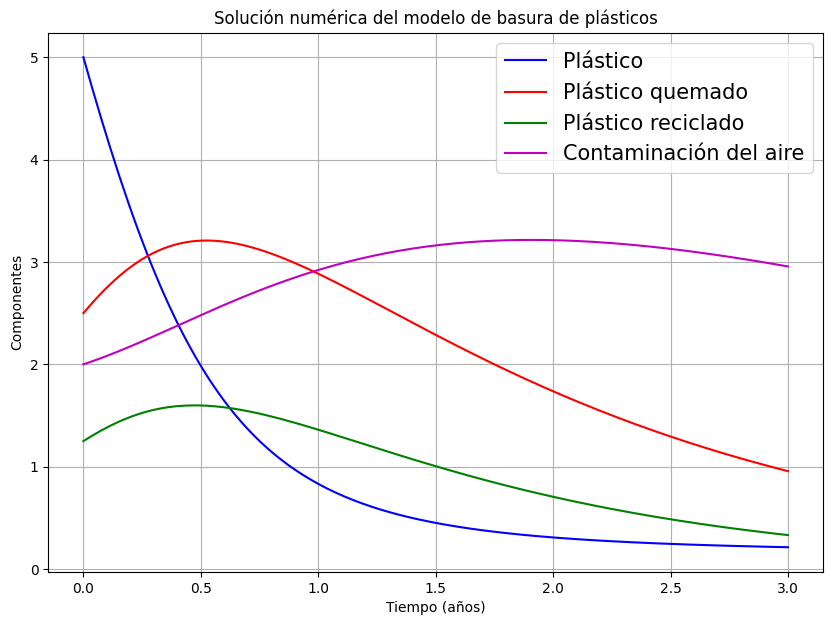

In [ ]:
#gráfica
plt.figure(figsize=(10,7))
plt.plot(t, P, '-b', label="Plástico")
plt.plot(t, Q, '-r', label="Plástico quemado")
plt.plot(t, R, '-g', label="Plástico reciclado")
plt.plot(t, A, '-m', label="Contaminación del aire")
plt.xlabel("Tiempo (años)")
plt.ylabel("Componentes")
plt.title("Solución numérica del modelo de basura de plásticos")
plt.legend(loc = 'best', fontsize=15)
plt.grid(True)
plt.show()


# Conclusiones

Observamos que las soluciones numéricas tienden a cero, es decir, los valores de los componentes se reducen con el tiempo. En primer lugar, la cantidad disponible de plástico se reduce con el tiempo debido al plástico quemado y reciclado. Por su parte, el plástico quemado y plástico reciclado primero crecen hasta alcanzar un pico muy tan sólo en medio año para que sus crecimientos se reduzcan pues cada vez hay menos plástico que quemar y reciclar.

También notamos que la contaminación del aire crece inclusive después de la disminución del plástico quemado y reciclado, alcanza su pico casi a los 2 años y después decrece muy poco, debido a la poca cantidad de plástico restante, así como a la quema y reciclaje del mismo.

En conclusión, gracias al método de Euler pudimos graficar aproximaciones de las soluciones de las ecuaciones de este modelo y comprobar que disminuir la cantidad disponible y el uso del plástico es la solución más efectiva para disminuir la contaminación del aire, aunque otras otras soluciones menos efectivas siguen siendo quemar y reciclar o reutilizar el plástico.